last modified : 2021-3-28 by Imryoung Jeong

### Last week...
---
<ul>
    <li> split the data intro a training set, a validation set, and a test set</li>
    <li> but after a few epochs, all three models began to <i>overfit</i> ; the performance on never-before-seen data started stalling compared to the performance on the training data</li>
    </ul>

## 4.2 Evaluating machine-learning models

<ul>
    <li>Developing a model involves <i>tuning</i> (e.g. choosing the # of layers or <i>hyperparameters</i>), and we usually do this using the performance of the model on the validation data as a signal</li>
    <li>This could lead to an overfitting to the validation set, ending up with a model that performs artificially well on the validation data</li><br>
    <li>In order to deal with overfitting, we should split our data into training / validation / test sets. But what if when little data is available?</li>
    <li>Three classic evaluations : <b>Simple hold-out validation, K-fold validation</b>, iterated K-fold validation</li>
        </ul>

##### Simple hold-out validation
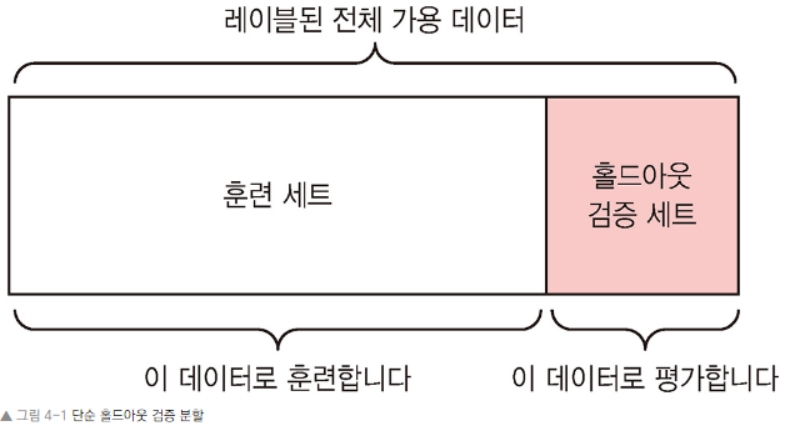

In [ ]:
# Simple hold-out validation

num_validation_samples = 10000

np.random.shuffle(data)

validation_data = data[:num_validation_samples]
data = data[num_validation_samples:]

training_data = data[:]

model = get_model()
model.train(training_data)
validation_score = model.evaluate(validation_data)

#=== tune your model here ===#

model = get_model()
model.train(np.concatenate([training_data,
                           validation_data]))
test_socre = model.evaluate(test_data)

##### K-fold validation
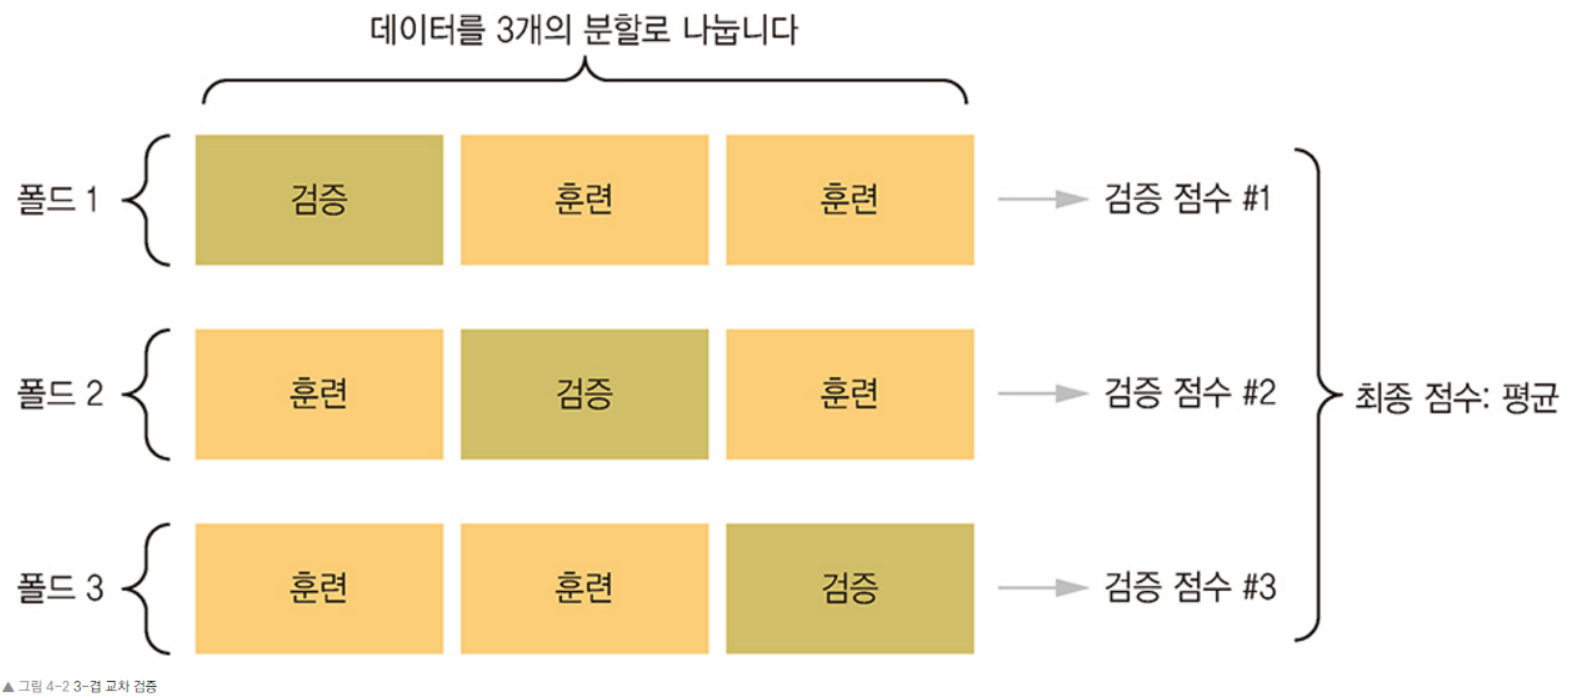

In [ ]:
# K-fold validation

# step 1. split the data into K partitions of equal size
k = 4 
num_validation_samples = len(data) // k
np.random.shuffle(data)

validation_scores = []

# step 2. Train a model on the K-1 partitions and evaluate on partition i
for fold in range(k):
    validation_data = data[num_validation_samples*fold:
                          num_validation_samples*(fold +1)]
    training_data = data[:num_validation_samples * fold] + data[num_validation_samples*(fold +1):]
    
    model = get_model()
    model.train(training_data)
    validation_score = model.evaluate(validation_data)
    validation_scores.append(validation_score)

# step 3. Final score as the average of the K scores obtained
validation_score = np.average(validation_scores)

#=== tune your model here ===#

model = get_model()
model.train(data)
test_score = model.evaluate(test_data)

#### Things to keep in mind ...
<ol>
    <li>Data representativeness : both your training and test set to be representative of the data at hand. -- usually should <i>randomly shuffle</i> the data</li>
    <li>The arrow of the time : if you are trying to predict the future using the past, you should NOT randomly shuffle the data! Always make sure all data in your test set is posterior to the data in the training set.</li>
    <li>Redundancy in your data : if some data points appear twice, then shuffling the data and splitting it into a training set and a validation set will result in redundancy bw the training and validation sets. --you'll be testing on part of your training data, so make sure your training set and validation set are disjoint.

## 4.3 Data processing, feature engineering, and feature learning

#### Data preprocessing for neural networks
<ol>
    <li>Vectorization : turning raw data into tensors of floating-point data</li>
    <li>Value normalization : normalize values in the 0-1 range. In general, relatively large values or heterogeneous data(e.g. housing price example) is not safe. 
        <br>Especially, normalize each feature independently to have a mean of 0 with a standard deviation of 1 using following codes : <code> x -= x.mean(axis=0) </code> <code> x /= x.std(axis=0)</code></li>
    <li>Hanlding missing values : input missing values as 0, with the condition that 0 isn't already a meaningful value</li>
    </ol>

#### Feature engineering
<ul>
    <li> To make the algorithm work better by applying non-learned transformations to the data before it goes into the model</li>
    !Figure 4.3 put here!